# SN Different Roll Periods
* Functional version of the signal to noise for a different point.
* Exploring the S/N for different windows. This uses the functional version of the sn for single point

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-darkgrid')
import xarray as xr
import pandas as pd
from dask.diagnostics import ProgressBar
import matplotlib as mpl
from importlib import reload
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from enum import Enum
from dask.diagnostics import ProgressBar
import sys, matplotlib, os
# Contains path information
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))
import constants
sys.path.append(constants.MODULE_DIR)
import utils
import signal_to_noise as sn
import xarray_class_accessors as xca
import sn_plotting as sn_plot
from warnings import filterwarnings
import classes
filterwarnings('ignore')

In [2]:
variable = 'tas'
model = 'ipslcm5a'#'MPIESM11'

In [3]:
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, variable,'regrid_retimestamped')
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/tas/regrid_retimestamped'

In [4]:
IMG_DIR = constants.IMAGE_SAVE_DIR_TOP_LEVEL
IMG_DIR

'/g/data/w40/ab2313/images/PhD/top_level'

In [5]:
notebook_number ='02'

# Calculation

## Loading Data 
In this notebook everythning need to be run together to check the affect of having different roll period.s

In [6]:
chunks = {'lat':48/2,'lon':96/2,'time':-1}
WINDOW = constants.WINDOWS_OF_INTEREST[1]
WINDOW

81

In [7]:
models = constants.LONGRUNMIP_MODELS
model = 'ipslcm5a'

model_files = [f for f in os.listdir(ROOT_DIR) if ('control' in f or 'abrupt4x' in f) and model in f.lower()]
control_fname = str([f for f in model_files if 'control' in f][0])
abrupt_fname = str([f for f in model_files if 'abrupt' in f][0])
print(control_fname, abrupt_fname, sep=', ')

tas_mon_IPSLCM5A_control_1000_g025.nc, tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc


In [8]:
# Open Data
control = xr.open_dataset(os.path.join(ROOT_DIR, control_fname),use_cftime = True, chunks = chunks).tas
abrupt = xr.open_dataset(os.path.join(ROOT_DIR, abrupt_fname),use_cftime = True, chunks = chunks).tas
abrupt

<xarray.DataArray 'tas' (time: 1000, lat: 72, lon: 144)>
dask.array<open_dataset-15c6ef19688a85022a09e6451997b634tas, shape=(1000, 72, 144), dtype=float32, chunksize=(1000, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 1000-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height   float64 ...

In [9]:
### Control
control_anom = control.clima.anomalies()
control_anom_smean = control_anom.clima.space_mean()

### Abrupt
abrupt_anom = abrupt.clima.anomalies(historical = control)
abrupt_anom_smean = abrupt_anom.clima.space_mean()
abrupt_anom_smean

<xarray.DataArray 'tas' (time: 1000)>
dask.array<truediv, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 1000-12-31 00:00:00
    height   float64 2.0

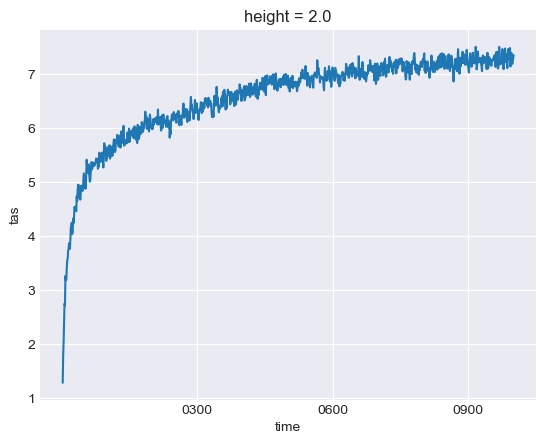

In [10]:
abrupt_anom_smean.plot()

In [11]:
dir(classes.LocationsLatLon)

['ARCTIC',
 'BEIJING',
 'BUENOS_AIRES',
 'CENTRAL_PACIFIC',
 'ECHINA_SEA',
 'EPACIFIC',
 'JAKARTA',
 'KINSHASA',
 'LONDON',
 'MELBOURNE',
 'NATLANTIC',
 'NEW_YORK',
 'SOUTHERN_OCEAN',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [12]:
latlon1 = classes.locationsLatLon2.ANTARCTIC.value
latlon2 = classes.locationsLatLon2.SOLOMON_ISLANDS.value
latlon3 = classes.LocationsLatLon.ARCTIC.value

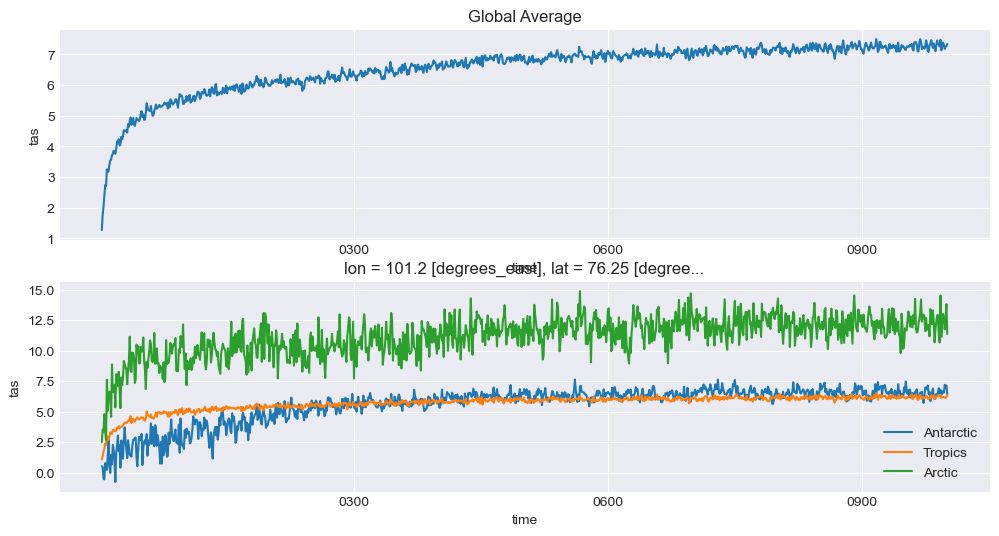

In [21]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
(abrupt_anom_smean).plot(ax=ax1)
ax1.set_title('Global Average')

ax2 = fig.add_subplot(gs[1, :])
abrupt_anom.sel(lat=latlon1[0], lon=latlon1[1], method='nearest').plot(label='Antarctic', ax=ax2)
abrupt_anom.sel(lat=latlon2[0], lon=latlon2[1], method='nearest').plot(label='Tropics', ax=ax2)
abrupt_anom.sel(lat=latlon3[0], lon=latlon3[1], method='nearest').plot(label='Arctic', ax=ax2)

plt.legend()

In [14]:
import stats

In [15]:
abrupt_polyfit = stats.trend_fit(abrupt_anom_smean, method='polynomial', order=5)

In [16]:
abrupt_lowess_10 = stats.trend_fit(abrupt_anom_smean, method='lowess', lowess_window=10)
abrupt_lowess_30 = stats.trend_fit(abrupt_anom_smean, method='lowess', lowess_window=30)
abrupt_lowess_50 = stats.trend_fit(abrupt_anom_smean, method='lowess', lowess_window=50)
abrupt_lowess_100 = stats.trend_fit(abrupt_anom_smean, method='lowess', lowess_window=100)

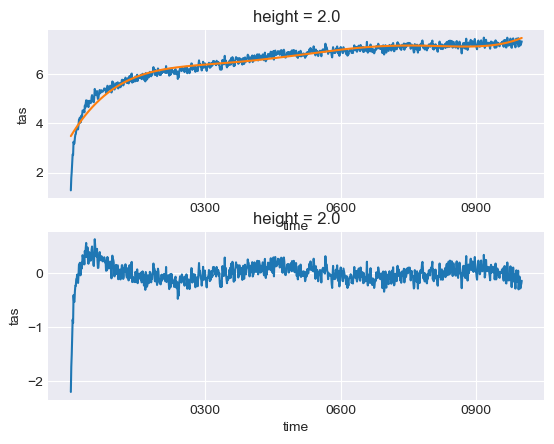

In [17]:
fig = plt.figure()
ax = fig.add_subplot(211)
abrupt_anom_smean.plot(ax=ax)
abrupt_polyfit.plot(ax=ax)
ax2 = ax = fig.add_subplot(212)
(abrupt_anom_smean-abrupt_polyfit).plot(ax=ax2)

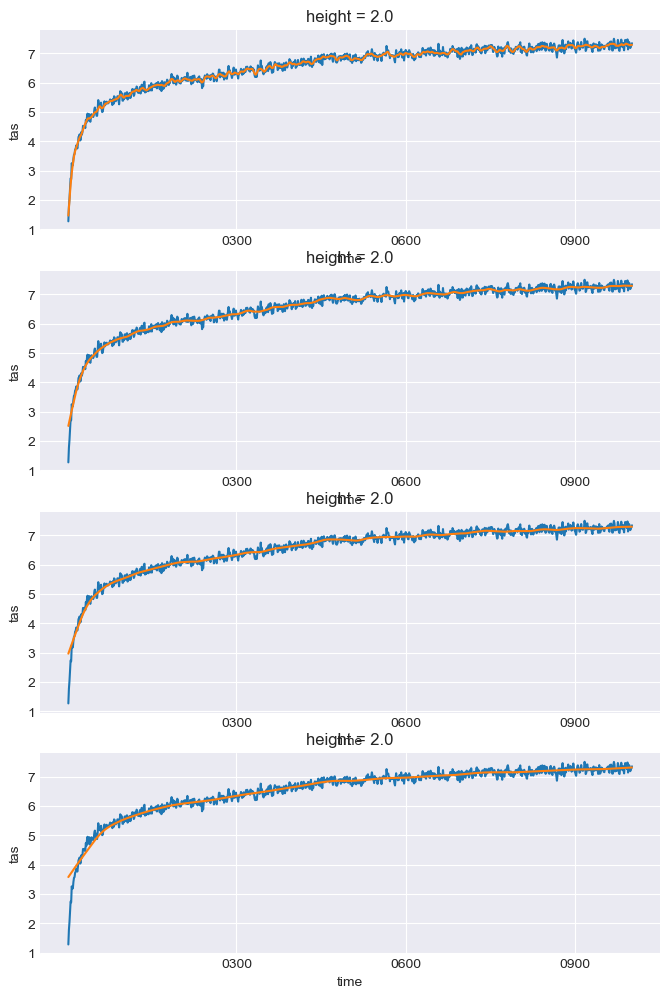

In [18]:
fig = plt.figure(figsize=(8, 12))

ax1 = fig.add_subplot(411)
ax1.set_title('10 Years')
abrupt_anom_smean.plot(ax=ax1)
abrupt_lowess_10.plot(ax=ax1)


ax2 = fig.add_subplot(412)
ax2.set_title('30 Years')
abrupt_anom_smean.plot(ax=ax2)
abrupt_lowess_30.plot(ax=ax2)


ax3 = fig.add_subplot(413)
ax3.set_title('50 Years')
abrupt_anom_smean.plot(ax=ax3)
abrupt_lowess_50.plot(ax=ax3)

ax4 = fig.add_subplot(414)
ax4.set_title('100 Years')
abrupt_anom_smean.plot(ax=ax4)
abrupt_lowess_100.plot(ax=ax4)


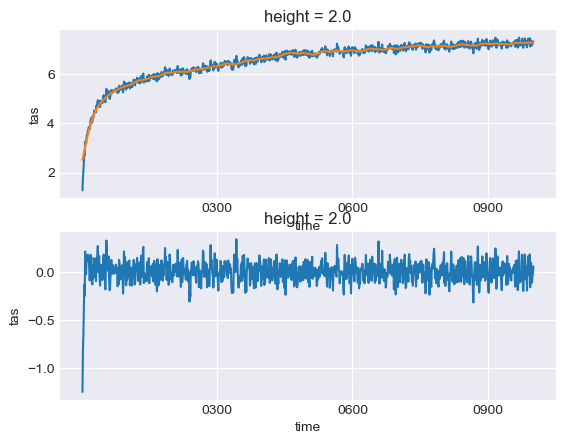

In [19]:
fig = plt.figure()
ax = fig.add_subplot(211)
abrupt_anom_smean.plot(ax=ax)
abrupt_lowess_30.plot(ax=ax)
ax2 = ax = fig.add_subplot(212)
(abrupt_anom_smean-abrupt_lowess_30).plot(ax=ax2)